<a href="https://colab.research.google.com/github/PauForestal/master_bdds/blob/main/M7_AI1_VallejoPaula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **<center>Máster en Big Data & Data Science**
### **<center>Institut de Formació Contínua-IL3 - Universitat de Barcelona**

### **Módulo 7 | Actividad Individual 1**
#### **Padawan: Paula Vallejo Vargas**

---
---

## **Descripción de la tarea**

#### Contexto

En esta práctica realizaremos clasificación de imágenes con Support Vector Machine. Para ello, utilizaremos dos datasets: MNIST y Fashion-MNIST. 

**MNIST**

Es un dataset de dígitos de MNIST (Modified-NIST, del Instituto Nacional de Estándares y Tecnología de EEUU).

Consta de 60.000 imágenes de entrenamiento y 10.000 de prueba. El tamaño de la imagen es de 28 x 28 píxeles. Cada imagen está etiquetada de 0 a 9 en función del dígito representado. 

Se utiliza como banco de pruebas para clasificar imágenes con algoritmos de Machine Learning. 

**Fashion-MNIST**

Es un dataset de imágenes de artículos de moda de la empresa Zalando. Fue concebido para sustituir a MNIST porque requiere modelos de clasificación más complejos. 

Mantiene las características de MNIST en cuanto a número de imágenes (60.000 de entrenamiento y 10.000 de prueba), tamaño de las imágenes (28 x 28 píxeles) y número de clases (10). 

Se diferencia en el contenido de las imágenes: 10 tipos de artículos de moda, en lugar de los 10 dígitos. 

El objetivo es comparar el resultado (accuracy) en función del dataset y el tipo de kernel SVM.

## **Importación de Librerías necesarias**

In [1]:
from time import time
import datetime
import numpy as np

import tensorflow as tf

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report

from matplotlib import pyplot as plt
%matplotlib inline

## **Lectura del dataset desde TensorFlow**

## **Primer Dataset: MNIST**

In [2]:
(X1_train, y1_train), (X1_test, y1_test) = tf.keras.datasets.mnist.load_data()

print(f'Dataset MNIST:\nShape X1_train: {X1_train.shape},\nShape y1_train: {y1_train.shape},\nShape X1_test: {X1_test.shape}, \nShape y1_test: {y1_test.shape}')

Dataset MNIST:
Shape X1_train: (60000, 28, 28),
Shape y1_train: (60000,),
Shape X1_test: (10000, 28, 28), 
Shape y1_test: (10000,)


#### *Revisión dataset*

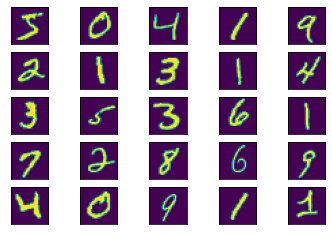

In [3]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X1_train[i]) #imshow  takes an array ( with dimension = 2, RGB or B/W) and gives you the image that corresponds to it
plt.show() 

# **Conversión para pasar de 3d-array a 2d-array (con “reshape”)**

Dado que son imágenes de 28x28 pixeles, se hace un reshape para pasar de 3D a 2D y así transformar cada feature (columna) en 1 pixel. Es por ello que la cantidad de features establecidas será de 784 (28x28)

In [4]:
X1_train = X1_train.reshape(60000,-1) # convertimos el array de 60000x28x28 en otro de 60000x787
X1_test = X1_test.reshape(10000,-1) # convertimos el array de 10000x28x28 en otro de 10000x787

# **Normalización de datos**

Esto se realiza dado que las features o características se encuentran en el rango de 0 a 255 pixeles.

In [5]:
# Normalizing the data
X1_train = X1_train/255.0
X1_test = X1_test/255.0

## **Definición del tamaño de la muestra**

Se utilizará una muestra de 20.000 observaciones para el entrenamiento y testeo del modelo.

In [6]:
X1_train = X1_train[0:20000]
y1_train = y1_train[0:20000]

print(f'Dataset MNIST:\nShape X1_train: {X1_train.shape},\nShape y1_train: {y1_train.shape},\nShape X1_test: {X1_test.shape}, \nShape y1_test: {y1_test.shape}')

Dataset MNIST:
Shape X1_train: (20000, 784),
Shape y1_train: (20000,),
Shape X1_test: (10000, 784), 
Shape y1_test: (10000,)


## **Definición de datos de entrenamiento y testeo, según tamaño de muestra definido anteriormente**

In [7]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X1_train, y1_train, test_size = 0.3, random_state = 10)

En el siguiente paso se realizará una comparación de dos modelos: Kernel lineal y otro no lineal llamado Kernel radial o Gaussiano.

Esta comparación se realizará mediante una búsqueda *grid* y se eligirá la mejor combinación (esto se realiza mediante validación cruzada).

Las combinaciones para el entrenamiento de ambos modelos estarán centradas en el parámetro **C** que nos permitirá determinar la variable de ajuste, y el tipo de kernel que como se dijo anteriormente, será lineal o gaussiano.

Adicionalmente, se obtendrá el tiempo de procesamiento para encontrar la mejor combinación. Este factor es muy relevante ya que con el se puede determinar si se justifica o no el costo computacional de modificar o hacer variaciones en el modelo.

In [8]:
parameters = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
              {'kernel': ['rbf'], 'C': [1, 10, 100, 1000]}
              ]

timeIni = time()
grid = GridSearchCV(SVC(), parameters)
grid.fit(X_train, y_train)
timeEnd = time()
timeDiff = datetime.datetime.fromtimestamp(timeEnd-timeIni).strftime("%M:%S:%f")

print("La mejor parametrización para la SVM (en el conjunto de training) es: ", grid.best_params_)
print("Tiempo necesario para su cómputo: ", timeDiff)

La mejor parametrización para la SVM (en el conjunto de training) es:  {'C': 10, 'kernel': 'rbf'}
Tiempo necesario para su cómputo:  11:51:612943


Una vez que hemos definido cuál es el conjunto de parámetros optimos para obtener el mejor modelo entrenado, es importante revisar la performance del modelo con datos no evaluados anteriormente, de esta manera podemos determinar si hay o no una mejor combinación de parámetros. Esta evaluación se realizará utilizando los datos de test obtenidos mediante el proceso de determinación de datos de entrenamiento y testeo en paso anterior.

En este paso, se realizará un loop con los distintos valores de C ya utilizados y se contrastará con los datos de testeo para determinar el accuracy del modelo con esos parámetros específicos. Así podremos verificar, o no, cuál es realmente el mejor modelo según el nivel de precisión logrado en la detección de categorías con datos nuevos.

In [9]:
minAcc = 100
maxAcc = 0
rapidoAcc = 0
lentoAcc = 0
mejorTime = 0
peorTime = 0
minTime = 1000000000
maxTime = 0

mejorModelo = SVC()
peorModelo = SVC()
rapidoModelo = SVC()
lentoModelo = SVC()

In [10]:
kernel = "linear"

for c in (1, 10, 100, 1000):
  print("Kernel lineal con C=", c)
  
  timeIni = time()
  modelo = SVC(kernel = kernel, C=c).fit(X_train, y_train)
  print(modelo)
  timeEnd = time()
  timeDiff = datetime.datetime.fromtimestamp(timeEnd-timeIni).strftime("%M:%S:%f")

  acc = modelo.score(X_test, y_test)
  print("Precisión (accuracy): ", acc)
  print("Tiempo entrenamiento: ", timeDiff)

  predicciones = modelo.predict(X_test)
  print("Matriz de confusión:")
  print(confusion_matrix(y_test, predicciones))
  print(classification_report(y_test, predicciones))
  print("---------------------------------------")
  print()

  if (maxAcc < acc):
      maxAcc = acc
      mejorTime = timeEnd-timeIni
      mejorModelo = modelo

  if (minAcc > acc):
      minAcc = acc
      peorTime = timeEnd-timeIni
      peorModelo = modelo

  if (timeEnd-timeIni > maxTime):
      lentoAcc = acc
      maxTime = timeEnd-timeIni
      lentoModelo = modelo

  if (timeEnd-timeIni < minTime):
      rapidoAcc = acc
      minTime = timeEnd-timeIni
      rapidoModelo = modelo

Kernel lineal con C= 1
SVC(C=1, kernel='linear')
Precisión (accuracy):  0.9228333333333333
Tiempo entrenamiento:  00:13:463962
Matriz de confusión:
[[594   0   1   0   0   5   4   1   0   0]
 [  0 680   0   2   1   2   1   0   3   0]
 [  4  10 561   7   6   6   4   7  13   0]
 [  2   5  17 544   1  12   1   6   8   2]
 [  4   4   3   1 560   0   5   3   0  17]
 [  9   5   4  21   2 464   6   0   4   4]
 [  6   2  10   1   3   6 528   0   3   0]
 [  0   1   3   3  10   0   0 576   2  13]
 [  5  14  16  31   2  14   7   1 484   8]
 [  6   4   2  15  20   5   2  22   3 546]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       605
           1       0.94      0.99      0.96       689
           2       0.91      0.91      0.91       618
           3       0.87      0.91      0.89       598
           4       0.93      0.94      0.93       597
           5       0.90      0.89      0.90       519
           6       0.95      0.94      0.9

In [11]:
kernel = "rbf"

for c in (1, 10, 100, 1000):
    print("Kernel Gaussiano con C=", c)
    timeIni = time()
    modelo = SVC(kernel = kernel, C=c).fit(X_train, y_train)
    print(modelo.fit(X_train, y_train))
    timeEnd = time()
    timeDiff = datetime.datetime.fromtimestamp(timeEnd-timeIni).strftime("%M:%S:%f")

    acc = modelo.score(X_test, y_test)
    print("Precisión (accuracy): ", acc)
    print("Tiempo entrenamiento: ", timeDiff)

    predicciones = modelo.predict(X_test)
    print("Matriz de confusión:")
    print(confusion_matrix(y_test, predicciones))
    print(classification_report(y_test, predicciones))
    print("---------------------------------------")
    print()

    if (maxAcc < acc):
      maxAcc = acc
      mejorTime = timeEnd-timeIni
      mejorModelo = modelo

    if (minAcc > acc):
      minAcc = acc
      peorTime = timeEnd-timeIni
      peorModelo = modelo

    if (timeEnd-timeIni > maxTime):
      lentoAcc = acc
      maxTime = timeEnd-timeIni
      lentoModelo = modelo

    if (timeEnd-timeIni < minTime):
      rapidoAcc = acc
      minTime = timeEnd-timeIni
      rapidoModelo = modelo

Kernel Gaussiano con C= 1
SVC(C=1)
Precisión (accuracy):  0.9661666666666666
Tiempo entrenamiento:  00:45:984423
Matriz de confusión:
[[602   0   0   0   0   2   0   0   1   0]
 [  0 684   1   0   1   2   0   0   1   0]
 [  4   2 593   4   5   0   1   5   4   0]
 [  0   2   8 571   0   2   1   5   6   3]
 [  0   2   2   0 578   0   2   1   0  12]
 [  6   1   0  12   1 496   1   0   0   2]
 [  4   1   0   1   2   2 547   0   2   0]
 [  0   0   0   0   4   0   0 594   2   8]
 [  1   5   1   5   3   4   3   1 554   5]
 [  2   3   0  12  13   2   1   9   5 578]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       605
           1       0.98      0.99      0.98       689
           2       0.98      0.96      0.97       618
           3       0.94      0.95      0.95       598
           4       0.95      0.97      0.96       597
           5       0.97      0.96      0.96       519
           6       0.98      0.98      0.98       559
  

In [12]:
print("El mejor modelo es: ", mejorModelo.kernel)
print(mejorModelo)
print("Accuracy: ", maxAcc)
print("Tiempo: ", datetime.datetime.fromtimestamp(mejorTime).strftime("%M:%S:%f"))
print()

print("El peor modelo es: ", peorModelo.kernel)
print(peorModelo)
print("Accuracy: ", minAcc)
print("Tiempo: ", datetime.datetime.fromtimestamp(peorTime).strftime("%M:%S:%f"))
print()

print("El modelo más rápido es: ", rapidoModelo.kernel)
print(rapidoModelo)
print("Accuracy: ", rapidoAcc)
print("Tiempo: ", datetime.datetime.fromtimestamp(minTime).strftime("%M:%S:%f"))
print()

print("El modelo más lento es: ", lentoModelo.kernel)
print(lentoModelo)
print("Accuracy: ", lentoAcc)
print("Tiempo: ", datetime.datetime.fromtimestamp(maxTime).strftime("%M:%S:%f"))

El mejor modelo es:  rbf
SVC(C=10)
Accuracy:  0.9755
Tiempo:  00:42:326012

El peor modelo es:  linear
SVC(C=10, kernel='linear')
Accuracy:  0.9141666666666667
Tiempo:  00:13:734384

El modelo más rápido es:  linear
SVC(C=1, kernel='linear')
Accuracy:  0.9228333333333333
Tiempo:  00:13:463962

El modelo más lento es:  rbf
SVC(C=1)
Accuracy:  0.9661666666666666
Tiempo:  00:45:984423


Luego de realizar el proceso anterior, en que hemos entrenado un set de datos de 14.000 observaciones y lo hemos podido testear con otro de 6.000 observaciones, podemos comprobar que el mejor modelo es aquel que se entrena mediante Kernel Gaussiano, con un valor de la variable de ajuste de 10 (c=10). Con esto, obtenemos una accuracy o precisión del 97,6% y un tiempo de ejecución de 35 minutos.

Finalmente, volvemos a validar el modelo, esta vez con los datos apartados al principio (X1_test). Estos datos no han sido ingresados al modelo para entrenar ni testear, por lo que nos permitirá realizar una validación bastante buena de nuestro modelo.

In [13]:
acc = mejorModelo.score(X1_test, y1_test)
print("Precisión (accuracy): ", acc)
print("Tiempo entrenamiento: ", timeDiff)

predicciones = mejorModelo.predict(X1_test)
print("Matriz de confusión:")
print(confusion_matrix(y1_test, predicciones))
print(classification_report(y1_test, predicciones))
print("---------------------------------------")
print()

Precisión (accuracy):  0.9722
Tiempo entrenamiento:  00:43:766101
Matriz de confusión:
[[ 969    0    1    0    0    2    4    1    3    0]
 [   0 1128    2    1    0    3    1    0    0    0]
 [   6    1 1003    0    2    0    1    9    8    2]
 [   0    1    4  986    1    5    0    4    7    2]
 [   1    1    3    0  953    0    5    1    2   16]
 [   4    0    0   15    1  859    6    1    4    2]
 [   7    3    1    0    3    6  936    0    2    0]
 [   0   10   14    1    3    0    0  988    1   11]
 [   3    1    1   10    4    4    2    5  941    3]
 [   5    5    0   10   15    1    0   10    4  959]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
   

Tal como se suponía, efectivamente hemos podido validar el modelo, con una precisión entre 97,2% y 97,6% y un tiempo de entrenamiento de 35 minutos aproximadamente.

In [14]:
result1 = mejorModelo.predict(X1_test)

## **Visualización de predicciones**

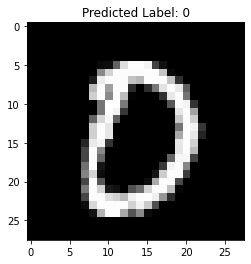

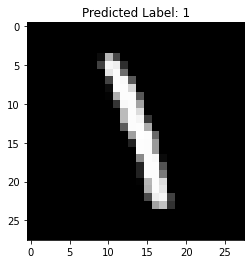

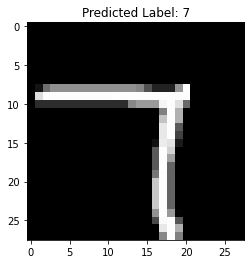

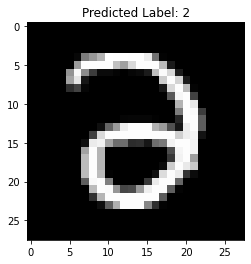

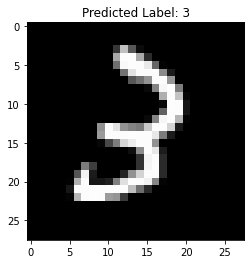

In [15]:
a = np.random.randint(1,400,5)
for i in a:
    two_d = (np.reshape(X1_test[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Predicted Label: {0}'.format(result1[i]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.show()

## **Segundo Dataset: FASHION MNIST**

In [16]:
(X2_train, y2_train), (X2_test, y2_test) = tf.keras.datasets.fashion_mnist.load_data()

print(f'\nDataset fashion_MNIST:\nShape X2_train: {X2_train.shape},\nShape y2_train: {y2_train.shape},\nShape X2_test: {X2_test.shape}, \nShape y2_test: {y2_test.shape}')


Dataset fashion_MNIST:
Shape X2_train: (60000, 28, 28),
Shape y2_train: (60000,),
Shape X2_test: (10000, 28, 28), 
Shape y2_test: (10000,)


#### *Revisión dataset*

Label: 0


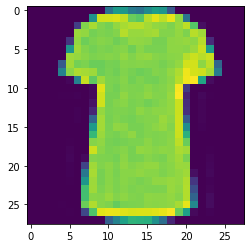

In [17]:
image_idx = 8998 
print(f'Label: {y2_train[image_idx]}')
plt.imshow(X2_train[image_idx]);

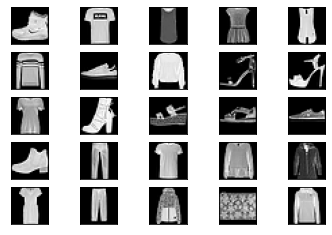

In [18]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X2_train[i], cmap='gray') #imshow  takes an array ( with dimension = 2, RGB or B/W) and gives you the image that corresponds to it
plt.show() 



# **Conversión y Normalización de datos y definición de tamaño de muestra**

In [19]:
# Convierto array de 60000x28x28 en otro de 60000x787
X2_train = X2_train.reshape(60000,-1) 
X2_test = X2_test.reshape(10000,-1)

# Normalizo los datos
X2_train = X2_train/255.0
X2_test = X2_test/255.0
 
# Defino array más pequeño con 20.000 datos de entrenamiento
X2_train = X2_train[0:20000] 
y2_train = y2_train[0:20000]

print(f'\nDataset fashion_MNIST:\nShape X2_train: {X2_train.shape},\nShape y2_train: {y2_train.shape},\nShape X2_test: {X2_test.shape}, \nShape y2_test: {y2_test.shape}')


Dataset fashion_MNIST:
Shape X2_train: (20000, 784),
Shape y2_train: (20000,),
Shape X2_test: (10000, 784), 
Shape y2_test: (10000,)


## **Definición de datos de entrenamiento y testeo, según tamaño de muestra definido anteriormente**

In [20]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X2_train, y2_train, test_size = 0.3, random_state = 10)

## **Definición de parámetros optimos para obtener el mejor modelo**

In [21]:
parameters = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
              {'kernel': ['rbf'], 'C': [1, 10, 100, 1000]}
              ]

timeIni = time()
grid = GridSearchCV(SVC(), parameters)
grid.fit(X_train, y_train)
timeEnd = time()
timeDiff = datetime.datetime.fromtimestamp(timeEnd-timeIni).strftime("%M:%S:%f")

print("La mejor parametrización para la SVM (en el conjunto de training) es: ", grid.best_params_)
print("Tiempo necesario para su cómputo: ", timeDiff)

La mejor parametrización para la SVM (en el conjunto de training) es:  {'C': 10, 'kernel': 'rbf'}
Tiempo necesario para su cómputo:  21:54:363796


## **Revisión de parámetros óptimos en la predicción de nuevos casos**

In [22]:
minAcc = 100
maxAcc = 0
rapidoAcc = 0
lentoAcc = 0
mejorTime = 0
peorTime = 0
minTime = 1000000000
maxTime = 0

mejorModelo = SVC()
peorModelo = SVC()
rapidoModelo = SVC()
lentoModelo = SVC()

In [23]:
kernel = "linear"

for c in (1, 10, 100, 1000):
  print("Kernel lineal con C=", c)
  
  timeIni = time()
  modelo = SVC(kernel = kernel, C=c).fit(X_train, y_train)
  print(modelo)
  timeEnd = time()
  timeDiff = datetime.datetime.fromtimestamp(timeEnd-timeIni).strftime("%M:%S:%f")

  acc = modelo.score(X_test, y_test)
  print("Precisión (accuracy): ", acc)
  print("Tiempo entrenamiento: ", timeDiff)

  predicciones = modelo.predict(X_test)
  print("Matriz de confusión:")
  print(confusion_matrix(y_test, predicciones))
  print(classification_report(y_test, predicciones))
  print("---------------------------------------")
  print()

  if (maxAcc < acc):
      maxAcc = acc
      mejorTime = timeEnd-timeIni
      mejorModelo = modelo

  if (minAcc > acc):
      minAcc = acc
      peorTime = timeEnd-timeIni
      peorModelo = modelo

  if (timeEnd-timeIni > maxTime):
      lentoAcc = acc
      maxTime = timeEnd-timeIni
      lentoModelo = modelo

  if (timeEnd-timeIni < minTime):
      rapidoAcc = acc
      minTime = timeEnd-timeIni
      rapidoModelo = modelo

Kernel lineal con C= 1
SVC(C=1, kernel='linear')
Precisión (accuracy):  0.8263333333333334
Tiempo entrenamiento:  00:18:166923
Matriz de confusión:
[[466   5  18  20   3   0  75   0   7   0]
 [  8 590   3   7   0   0   1   0   0   0]
 [ 15   0 430   9  80   0  64   0   1   0]
 [ 33  14  15 493  19   0  23   0   1   0]
 [  1   2  78  21 425   0  51   0   2   0]
 [  0   0   0   0   0 552   0  32   2  20]
 [ 98   2  78  21  78   0 375   0   8   1]
 [  0   0   0   0   0  20   0 537   0  21]
 [  9   1   6   6   2   4  14   3 531   0]
 [  0   0   0   0   0  14   0  25   1 559]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       594
           1       0.96      0.97      0.96       609
           2       0.68      0.72      0.70       599
           3       0.85      0.82      0.84       598
           4       0.70      0.73      0.72       580
           5       0.94      0.91      0.92       606
           6       0.62      0.57      0.5

In [24]:
kernel = "rbf"

for c in (1, 10, 100, 1000):
    print("Kernel Gaussiano con C=", c)
    timeIni = time()
    modelo = SVC(kernel = kernel, C=c).fit(X_train, y_train)
    print(modelo.fit(X_train, y_train))
    timeEnd = time()
    timeDiff = datetime.datetime.fromtimestamp(timeEnd-timeIni).strftime("%M:%S:%f")

    acc = modelo.score(X_test, y_test)
    print("Precisión (accuracy): ", acc)
    print("Tiempo entrenamiento: ", timeDiff)

    predicciones = modelo.predict(X_test)
    print("Matriz de confusión:")
    print(confusion_matrix(y_test, predicciones))
    print(classification_report(y_test, predicciones))
    print("---------------------------------------")
    print()

    if (maxAcc < acc):
      maxAcc = acc
      mejorTime = timeEnd-timeIni
      mejorModelo = modelo

    if (minAcc > acc):
      minAcc = acc
      peorTime = timeEnd-timeIni
      peorModelo = modelo

    if (timeEnd-timeIni > maxTime):
      lentoAcc = acc
      maxTime = timeEnd-timeIni
      lentoModelo = modelo

    if (timeEnd-timeIni < minTime):
      rapidoAcc = acc
      minTime = timeEnd-timeIni
      rapidoModelo = modelo

Kernel Gaussiano con C= 1
SVC(C=1)
Precisión (accuracy):  0.8601666666666666
Tiempo entrenamiento:  00:44:160491
Matriz de confusión:
[[487   3   8  27   2   0  60   0   7   0]
 [  3 589   9   7   0   0   1   0   0   0]
 [ 10   0 459   2  64   0  61   0   3   0]
 [ 26   2  10 521  22   0  17   0   0   0]
 [  0   1  57  18 462   0  40   0   2   0]
 [  0   0   0   0   0 569   0  24   3  10]
 [ 90   0  68  22  64   0 408   0   8   1]
 [  0   0   0   0   0  17   0 543   0  18]
 [  3   1   0   3   1   4  10   2 552   0]
 [  0   0   0   0   0   8   0  20   0 571]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       594
           1       0.99      0.97      0.98       609
           2       0.75      0.77      0.76       599
           3       0.87      0.87      0.87       598
           4       0.75      0.80      0.77       580
           5       0.95      0.94      0.95       606
           6       0.68      0.62      0.65       661
  

In [25]:
print("El mejor modelo es: ", mejorModelo.kernel)
print(mejorModelo)
print("Accuracy: ", maxAcc)
print("Tiempo: ", datetime.datetime.fromtimestamp(mejorTime).strftime("%M:%S:%f"))
print()

print("El peor modelo es: ", peorModelo.kernel)
print(peorModelo)
print("Accuracy: ", minAcc)
print("Tiempo: ", datetime.datetime.fromtimestamp(peorTime).strftime("%M:%S:%f"))
print()

print("El modelo más rápido es: ", rapidoModelo.kernel)
print(rapidoModelo)
print("Accuracy: ", rapidoAcc)
print("Tiempo: ", datetime.datetime.fromtimestamp(minTime).strftime("%M:%S:%f"))
print()

print("El modelo más lento es: ", lentoModelo.kernel)
print(lentoModelo)
print("Accuracy: ", lentoAcc)
print("Tiempo: ", datetime.datetime.fromtimestamp(maxTime).strftime("%M:%S:%f"))

El mejor modelo es:  rbf
SVC(C=10)
Accuracy:  0.8786666666666667
Tiempo:  00:40:633820

El peor modelo es:  linear
SVC(C=1000, kernel='linear')
Accuracy:  0.7943333333333333
Tiempo:  16:00:493108

El modelo más rápido es:  linear
SVC(C=1, kernel='linear')
Accuracy:  0.8263333333333334
Tiempo:  00:18:166923

El modelo más lento es:  linear
SVC(C=1000, kernel='linear')
Accuracy:  0.7943333333333333
Tiempo:  16:00:493108


Luego de realizar el proceso anterior, en que hemos entrenado un set de datos de 14.000 observaciones y lo hemos podido testear con otro de 6.000 observaciones, podemos comprobar que el mejor modelo es aquel que se entrena mediante Kernel Gaussiano, con un valor de la variable de ajuste de 10 (c=10). Con esto, obtenemos una accuracy o precisión del 87,6% y un tiempo de ejecución de 37 minutos.

Finalmente, volvemos a validar el modelo, esta vez con los datos apartados al principio (X2_test). Estos datos no han sido ingresados al modelo para entrenar ni testear, por lo que nos permitirá realizar una validación bastante buena de nuestro modelo.

In [26]:
acc = mejorModelo.score(X2_test, y2_test)
print("Precisión (accuracy): ", acc)
print("Tiempo entrenamiento: ", timeDiff)

predicciones = mejorModelo.predict(X2_test)
print("Matriz de confusión:")
print(confusion_matrix(y2_test, predicciones))
print(classification_report(y2_test, predicciones))
print("---------------------------------------")
print()

Precisión (accuracy):  0.8732
Tiempo entrenamiento:  00:37:797980
Matriz de confusión:
[[806   0  15  37   1   2 127   0  12   0]
 [  5 962   4  25   1   0   3   0   0   0]
 [ 19   2 815  11  91   0  60   0   2   0]
 [ 36   9  13 877  38   0  24   0   3   0]
 [  4   1 102  26 798   0  67   0   2   0]
 [  0   0   0   1   0 959   0  26   1  13]
 [124   1 107  31  67   0 658   0  12   0]
 [  0   0   0   0   0  30   0 944   0  26]
 [  3   1   6   6   4   3   8   4 965   0]
 [  0   0   0   0   0  14   0  37   1 948]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1000
           1       0.99      0.96      0.97      1000
           2       0.77      0.81      0.79      1000
           3       0.86      0.88      0.87      1000
           4       0.80      0.80      0.80      1000
           5       0.95      0.96      0.96      1000
           6       0.69      0.66      0.68      1000
           7       0.93      0.94      0.94      

En esta última validación, hemos llegado a una precisión de 87,3% (con un shape de 10.000 datos para validación). Las etiquetas peor predecidas son la 6 y 2 con un 69% y 77% de precisión respectivamente. Dichas etiquetas corresponden a shirt y pullover, indicando que son estas prendas las con más dificultad de ser predichas.

In [27]:
result = mejorModelo.predict(X2_test)

## **Visualización de predicciones**

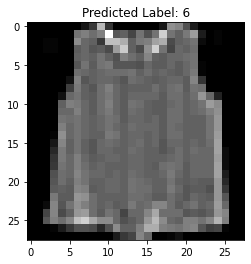

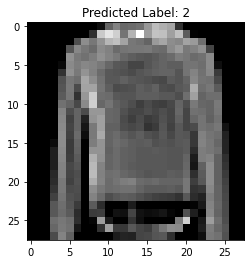

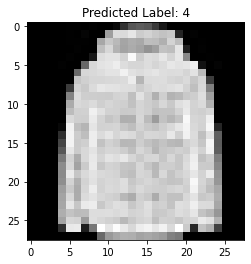

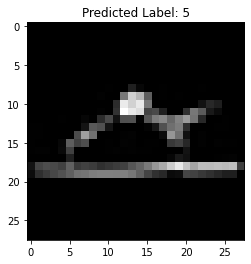

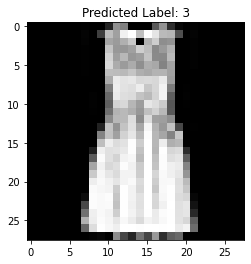

In [28]:
a = np.random.randint(1,400,5)
for i in a:
    two_d = (np.reshape(X2_test[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Predicted Label: {0}'.format(result[i]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.show()

## **Conclusión**

Luego de realizar este ejercicio, es posible comprobar que para ambos datasets el mejor modelo de clasificación es el de Kernel Radial o Gaussiano, logrando accuracy de 97% y 87% para cada dataset, lo que es bastante bueno.

